In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import yfinance as yf  
from datetime import date
from datetime import timedelta

import seaborn as sns
sns.set_palette("mako")
from matplotlib import pyplot as plt
%matplotlib inline

from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

plotsize = (15, 4)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

import os
if os.getcwd() == '/content':
  os.chdir('drive/MyDrive/DataTeam1/Index1')

Mounted at /content/drive


In [5]:
df = pd.read_csv('T10Y2Y.csv') #Dataset file
df.head()

,DATE,T10Y2Y
0,1976-06-01,0.68
1,1976-06-02,0.71
2,1976-06-03,0.70
3,1976-06-04,0.77
4,1976-06-07,0.79


In [6]:
df["DATE"] = pd.to_datetime(df["DATE"])
df = df.set_index('DATE') 
df["T10Y2Y"] = pd.to_numeric(df['T10Y2Y'], errors='coerce')
type(df["T10Y2Y"][0])

numpy.float64

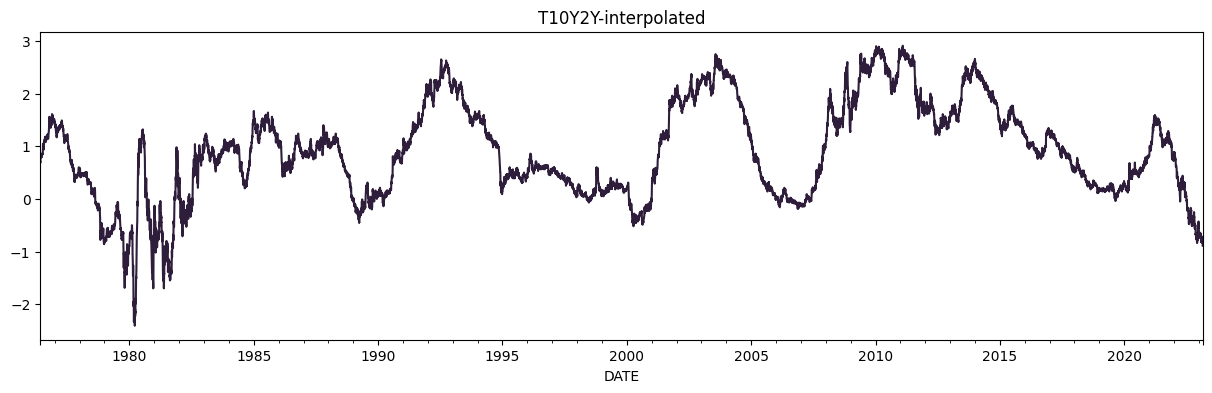

In [7]:
df["T10Y2Y"] = df.interpolate(method='time')
df["T10Y2Y"].plot(figsize = plotsize, title = "T10Y2Y-interpolated")
plt.show()

In [8]:
SP = yf.download('SPY')

[*********************100%***********************]  1 of 1 completed


In [9]:
SP.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,25.122328,1003200
1993-02-01,43.96875,44.25000,43.96875,44.25000,25.301025,480500
1993-02-02,44.21875,44.37500,44.12500,44.34375,25.354618,201300
1993-02-03,44.40625,44.84375,44.37500,44.81250,25.622643,529400
1993-02-04,44.96875,45.09375,44.46875,45.00000,25.729853,531500


In [11]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

def get_keras_format_series(series):
    
    series = np.array(series)
    return series.reshape(series.shape[0], series.shape[1], 1)